In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [3]:
from config import GEFSEmulator as Emulator

In [4]:
from graphufs.datasets import Dataset

In [5]:
gufs = Emulator()

Ignoring normalization for now


In [6]:
from graphufs.datasets import Dataset

In [7]:
tds = Dataset(gufs, mode="training")

In [8]:
sample = tds.sample_generator[2]
sample

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 1, fhr: 2, member: 2, lat: 179, lon: 360, level: 3)
Coordinates:
  * fhr        (fhr) int64 16B 0 6
  * lat        (lat) float64 1kB 89.0 88.0 87.0 86.0 ... -86.0 -87.0 -88.0 -89.0
    lead_time  (fhr) timedelta64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * member     (member) int64 16B 2 3
  * level      (level) float64 24B 500.0 800.0 1e+03
  * time       (time) datetime64[ns] 8B 2017-01-01
    datetime   (time, fhr) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Data variables:
    t2m        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    sp         (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    u10        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    sh2        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    orog       (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    q          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    w          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    t          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    v10        (time, fhr, member, lat, lon) float32 1MB dask.array<chunksize=(1, 1, 1, 179, 360), meta=np.ndarray>
    lsm        (lat, lon) float32 258kB dask.array<chunksize=(90, 360), meta=np.ndarray>
    v          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>
    u          (time, fhr, member, level, lat, lon) float32 3MB dask.array<chunksize=(1, 1, 1, 1, 179, 360), meta=np.ndarray>

In [9]:
i,t,f = gufs.extract_inputs_targets_forcings(sample, keep_member_id=True)

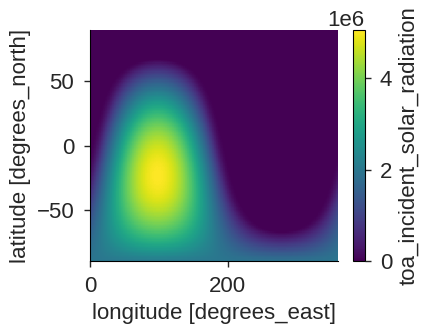

In [10]:
f.toa_incident_solar_radiation.plot()

In [11]:
x,y = tds[1]
print(x.shape, y.shape)

(1, 2, 179, 360, 32) (1, 2, 179, 360, 20)


In [12]:
from graphufs.batchloader import BatchLoader

/home/tsmith/work/graph-ufs/graphufs/mpi.py:13: UserWarning: graphufs.mpi: Unable to import mpi4py or mpi4jax, cannot use this module
  warnings.warn(f"graphufs.mpi: Unable to import mpi4py or mpi4jax, cannot use this module")


In [13]:
loader = BatchLoader(
    tds,
    batch_size=4,
    shuffle=True,
    drop_last=True,
)
                     

In [14]:
x,y = loader.get_data()

In [15]:
x.shape

(4, 2, 179, 360, 32)

In [16]:
y.shape

(4, 2, 179, 360, 20)

In [15]:
import xarray as xr
component = "mean" # see also: "stddev", "diffs_stddev"
ds = xr.open_zarr(
    f"gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.statistics.1993-2019/{component}_by_level.zarr",
    storage_options={"token": "anon"},
)

In [8]:
from graphcast import data_utils

In [10]:
yp = data_utils.get_year_progress(
    sample.datetime.data.astype("datetime64[s]").astype(int),
)

In [13]:
yp.shape

(2, 2)

In [14]:
data_utils.featurize_progress(
    name="yp",
    dims=sample.datetime.dims,
    progress=yp,
)

{'yp': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.00168948, 0.00237396],
        [0.00237396, 0.00305844]], dtype=float32),
 'yp_sin': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.01061513, 0.01491547],
        [0.01491547, 0.01921554]], dtype=float32),
 'yp_cos': <xarray.Variable (t0: 2, fhr: 2)> Size: 16B
 array([[0.9999437 , 0.9998888 ],
        [0.9998888 , 0.99981534]], dtype=float32)}

In [11]:
data_utils.add_derived_vars(sample)

In [12]:
sample

<xarray.Dataset> Size: 35MB
Dimensions:            (t0: 2, fhr: 2, member: 2, level: 3, lat: 181, lon: 360)
Coordinates:
  * fhr                (fhr) int64 16B 0 6
  * lat                (lat) float64 1kB 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
    lead_time          (fhr) timedelta64[ns] 16B 00:00:00 06:00:00
  * lon                (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * member             (member) int64 16B 0 1
  * level              (level) float64 24B 500.0 800.0 1e+03
  * t0                 (t0) datetime64[ns] 16B 2017-01-01 2017-01-01T06:00:00
    datetime           (t0, fhr) datetime64[ns] 32B 2017-01-01 ... 2017-01-01...
Data variables: (12/15)
    q                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    t                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    u                  (t0, fhr, member, level, lat, lon) float32 6MB dask.array<chunksize=(1, 1, 1, 1, 181, 360), meta=np.ndarray>
    v10                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t2m                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    u10                (t0, fhr, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    ...                 ...
    year_progress      (t0, fhr) float32 16B 0.001689 0.002374 0.002374 0.003058
    year_progress_sin  (t0, fhr) float32 16B 0.01062 0.01492 0.01492 0.01922
    year_progress_cos  (t0, fhr) float32 16B 0.9999 0.9999 0.9999 0.9998
    day_progress       (t0, fhr, lon) float32 6kB 0.0 0.002778 ... 0.4944 0.4972
    day_progress_sin   (t0, fhr, lon) float32 6kB 0.0 0.01745 ... 0.0349 0.01745
    day_progress_cos   (t0, fhr, lon) float32 6kB 1.0 0.9998 ... -0.9994 -0.9998

In [14]:
targets = xx.sel(fhr=[6]).squeeze(dim="fhr")

In [11]:
targets

<xarray.Dataset> Size: 27MB
Dimensions:     (datetime: 3, member: 2, lat: 181, lon: 360, level: 3)
Coordinates:
    fhr         int64 8B 6
  * lat         (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
    lead_time   timedelta64[ns] 8B dask.array<chunksize=(), meta=np.ndarray>
  * lon         (lon) float64 3kB 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * member      (member) int64 16B 0 1
  * level       (level) float64 24B 500.0 800.0 1e+03
  * datetime    (datetime) datetime64[ns] 24B 2017-01-01 ... 2017-01-01T12:00:00
    valid_time  (datetime) datetime64[ns] 24B dask.array<chunksize=(3,), meta=np.ndarray>
Data variables:
    v10         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    v           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    u10         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    sh2         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    q           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t2m         (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    sp          (datetime, member, lat, lon) float32 2MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    u           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t           (datetime, member, level, lat, lon) float32 5MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>